<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#변수-중요도-확인을-위한-x,-y-데이터-분할-및-Label-Encoding-진행" data-toc-modified-id="변수-중요도-확인을-위한-x,-y-데이터-분할-및-Label-Encoding-진행-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>변수 중요도 확인을 위한 x, y 데이터 분할 및 Label Encoding 진행</a></span></li><li><span><a href="#Decision-Tree-Regreesor를-통한-변수-중요도-확인" data-toc-modified-id="Decision-Tree-Regreesor를-통한-변수-중요도-확인-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Tree Regreesor를 통한 변수 중요도 확인</a></span></li><li><span><a href="#RandomForestRegressor로-변수-중요도-확인" data-toc-modified-id="RandomForestRegressor로-변수-중요도-확인-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RandomForestRegressor로 변수 중요도 확인</a></span></li><li><span><a href="#GradientBoostingRegressor를-통한-변수-중요도-확인" data-toc-modified-id="GradientBoostingRegressor를-통한-변수-중요도-확인-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GradientBoostingRegressor를 통한 변수 중요도 확인</a></span><ul class="toc-item"><li><span><a href="#>>-&quot;new_state&quot;-(지역)-변수를-추가하니-해당-변수의-중요도가-너무-높음.-해당-변수를-제외하고-나머지-변수들의-중요도를-보기-위해-변수-drop-후-다시-feature_importance-확인" data-toc-modified-id=">>-&quot;new_state&quot;-(지역)-변수를-추가하니-해당-변수의-중요도가-너무-높음.-해당-변수를-제외하고-나머지-변수들의-중요도를-보기-위해-변수-drop-후-다시-feature_importance-확인-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>&gt;&gt; "new_state" (지역) 변수를 추가하니 해당 변수의 중요도가 너무 높음. 해당 변수를 제외하고 나머지 변수들의 중요도를 보기 위해 변수 drop 후 다시 feature_importance 확인</a></span></li></ul></li><li><span><a href="#new_state-컬럼-drop-후-DecisionTreeRegressor로-변수-중요도-다시-확인" data-toc-modified-id="new_state-컬럼-drop-후-DecisionTreeRegressor로-변수-중요도-다시-확인-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>new_state 컬럼 drop 후 DecisionTreeRegressor로 변수 중요도 다시 확인</a></span></li><li><span><a href="#new_state-컬럼-drop-후-RandomForestRegressor로-변수-중요도-다시-확인" data-toc-modified-id="new_state-컬럼-drop-후-RandomForestRegressor로-변수-중요도-다시-확인-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>new_state 컬럼 drop 후 RandomForestRegressor로 변수 중요도 다시 확인</a></span></li><li><span><a href="#new_state-컬럼-drop-후-GradientBoostingRegressor로-변수-중요도-다시-확인" data-toc-modified-id="new_state-컬럼-drop-후-GradientBoostingRegressor로-변수-중요도-다시-확인-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>new_state 컬럼 drop 후 GradientBoostingRegressor로 변수 중요도 다시 확인</a></span></li><li><span><a href="#설명변수의-단위가-다르고,-정규성-검정-결과-정규성을-띄지-않는-변수(cctv_cnt,-smalight_cnt)-들이-있어서-min-max-scailing-진행-해보기로-함" data-toc-modified-id="설명변수의-단위가-다르고,-정규성-검정-결과-정규성을-띄지-않는-변수(cctv_cnt,-smalight_cnt)-들이-있어서-min-max-scailing-진행-해보기로-함-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>설명변수의 단위가 다르고, 정규성 검정 결과 정규성을 띄지 않는 변수(cctv_cnt, smalight_cnt) 들이 있어서 min-max scailing 진행 해보기로 함</a></span></li><li><span><a href="#Min-Max-Scale-후-DecisionTreeRegressor로-설명변수-중요도-확인" data-toc-modified-id="Min-Max-Scale-후-DecisionTreeRegressor로-설명변수-중요도-확인-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Min-Max Scale 후 DecisionTreeRegressor로 설명변수 중요도 확인</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_final = pd.read_csv('./df_security_concat_9.csv', encoding='cp949')
df_final

,state,city,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours,mean_days,new_state
0,강원도,정선군,8151609,515.0,4391.0,13.0,0.0271,90.36,427.8,1.62,강원도 정선군
1,강원도,평창군,13399820,190.0,6747.0,46.0,0.0271,90.36,395.8,1.62,강원도 평창군
2,강원도,홍천군,15125927,428.0,1191.0,37.0,0.0271,90.36,388.8,1.54,강원도 홍천군
3,강원도,양구군,1828609,296.0,190.0,22.0,0.0271,90.36,387.2,1.80,강원도 양구군
4,강원도,고성군,11612683,422.0,4391.0,94.0,0.0271,90.36,375.2,1.56,강원도 고성군
...,...,...,...,...,...,...,...,...,...,...,...
73,충청북도,제천시,12125010,979.0,9024.0,314.0,0.0299,219.20,324.8,1.60,충청북도 제천시
74,충청북도,보은군,4737641,316.0,6349.0,99.0,0.0299,219.20,298.2,1.54,충청북도 보은군
75,충청북도,충주시,14797862,1578.0,10600.0,219.0,0.0299,219.20,296.8,1.64,충청북도 충주시
76,충청북도,영동군,4133509,1.0,6076.0,112.0,0.0299,219.20,296.4,1.64,충청북도 영동군


## 변수 중요도 확인을 위한 x, y 데이터 분할 및 Label Encoding 진행

In [3]:
df_final_x = df_final.drop(['state', 'city', 'crime_rate', 'avg_pop_density', 'mean_days', 'mean_hours'], axis =1)
df_final_x

,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,new_state
0,8151609,515.0,4391.0,13.0,강원도 정선군
1,13399820,190.0,6747.0,46.0,강원도 평창군
2,15125927,428.0,1191.0,37.0,강원도 홍천군
3,1828609,296.0,190.0,22.0,강원도 양구군
4,11612683,422.0,4391.0,94.0,강원도 고성군
...,...,...,...,...,...
73,12125010,979.0,9024.0,314.0,충청북도 제천시
74,4737641,316.0,6349.0,99.0,충청북도 보은군
75,14797862,1578.0,10600.0,219.0,충청북도 충주시
76,4133509,1.0,6076.0,112.0,충청북도 영동군


In [4]:
df_final_y = df_final.crime_rate

In [5]:
v_feature_name=df_final_x.columns
v_feature_name

Index(['visit_cnt', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'new_state'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
qual_col = ['new_state']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(df_final_x[i])
    df_final_x[i] = le.transform(df_final_x[i])
print('Done.')

Done.


## Decision Tree Regreesor를 통한 변수 중요도 확인

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dt_ftimp = DecisionTreeRegressor(random_state=234,)
dt_ftimp.fit(df_final_x, df_final_y)
print("Score on training set: {:.3f}".format(dt_ftimp.score(df_final_x, df_final_y)))

Score on training set: 1.000


In [10]:
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic')

Text(0, 0.5, '설명변수')

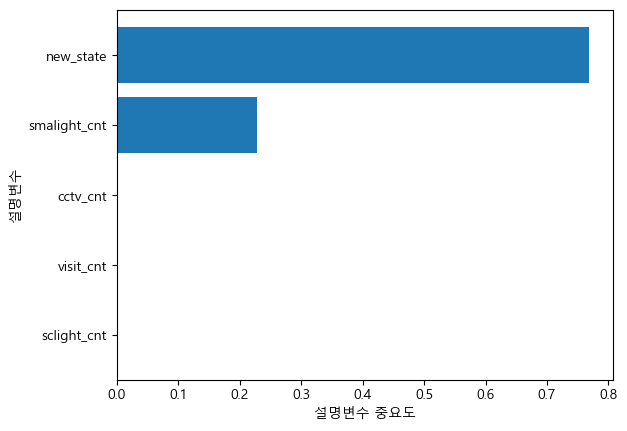

In [11]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dt_ftimp.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## RandomForestRegressor로 변수 중요도 확인

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf_ftimp = RandomForestRegressor(random_state=234,)
rf_ftimp.fit(df_final_x, df_final_y)
print("Score on training set: {:.3f}".format(rf_ftimp.score(df_final_x, df_final_y)))

Score on training set: 0.942


Text(0, 0.5, '설명변수')

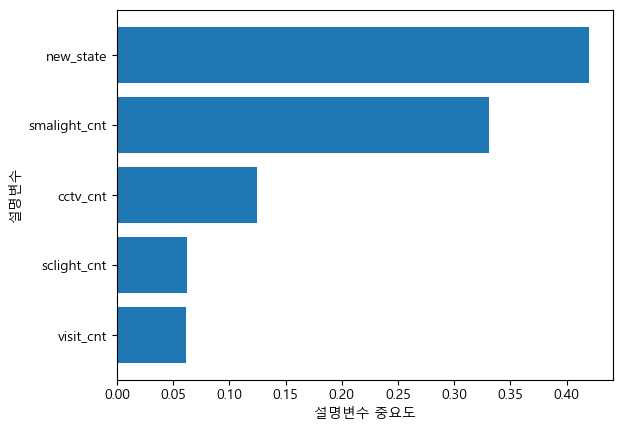

In [14]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_ftimp.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## GradientBoostingRegressor를 통한 변수 중요도 확인

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
gb_ftimp = GradientBoostingRegressor(random_state=234,)
gb_ftimp.fit(df_final_x, df_final_y)
print("Score on training set: {:.3f}".format(gb_ftimp.score(df_final_x, df_final_y)))

Score on training set: 0.999


Text(0, 0.5, '설명변수')

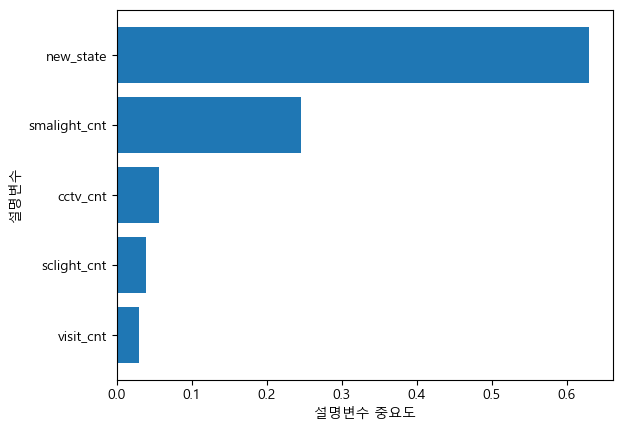

In [17]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_ftimp.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### >> "new_state" (지역) 변수를 추가하니 해당 변수의 중요도가 너무 높음. 해당 변수를 제외하고 나머지 변수들의 중요도를 보기 위해 변수 drop 후 다시 feature_importance 확인

In [18]:
df_drop_state = df_final_x.drop(['new_state'], axis=1)
df_drop_state

,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt
0,8151609,515.0,4391.0,13.0
1,13399820,190.0,6747.0,46.0
2,15125927,428.0,1191.0,37.0
3,1828609,296.0,190.0,22.0
4,11612683,422.0,4391.0,94.0
...,...,...,...,...
73,12125010,979.0,9024.0,314.0
74,4737641,316.0,6349.0,99.0
75,14797862,1578.0,10600.0,219.0
76,4133509,1.0,6076.0,112.0


In [19]:
v_feature_name2 = df_drop_state.columns

## new_state 컬럼 drop 후 DecisionTreeRegressor로 변수 중요도 다시 확인

In [20]:
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dt_ftimp2 = DecisionTreeRegressor(random_state=456,)
dt_ftimp2.fit(df_drop_state, df_final_y)
print("Score on training set: {:.3f}".format(dt_ftimp2.score(df_drop_state, df_final_y)))

Score on training set: 1.000


Text(0, 0.5, '설명변수')

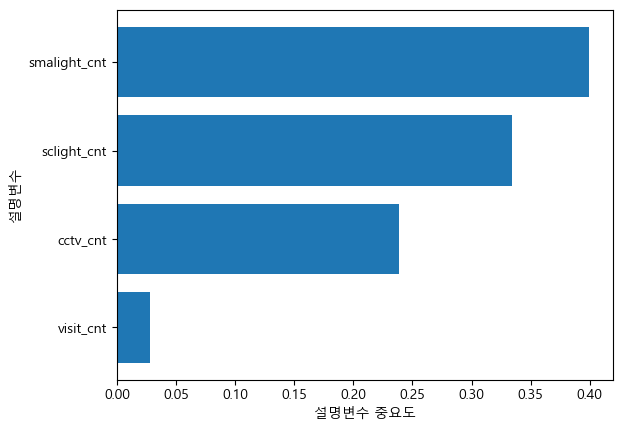

In [23]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name2
df_importance['Importance'] = dt_ftimp2.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [24]:
df_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
3,smalight_cnt,0.399562
2,sclight_cnt,0.334109
1,cctv_cnt,0.238682
0,visit_cnt,0.027647


## new_state 컬럼 drop 후 RandomForestRegressor로 변수 중요도 다시 확인

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf_ftimp2 = RandomForestRegressor(random_state=456,)
rf_ftimp2.fit(df_drop_state, df_final_y)
print("Score on training set: {:.3f}".format(rf_ftimp2.score(df_drop_state, df_final_y)))

Score on training set: 0.834


Text(0, 0.5, '설명변수')

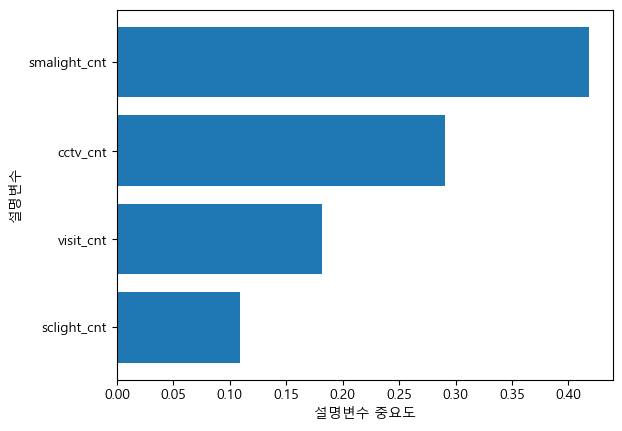

In [27]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name2
df_importance['Importance'] = rf_ftimp2.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [28]:
df_importance

,Feature,Importance
2,sclight_cnt,0.109294
0,visit_cnt,0.181528
1,cctv_cnt,0.290758
3,smalight_cnt,0.418421


## new_state 컬럼 drop 후 GradientBoostingRegressor로 변수 중요도 다시 확인

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gb_ftimp2 = GradientBoostingRegressor(random_state=234,)
gb_ftimp2.fit(df_drop_state, df_final_y)
print("Score on training set: {:.3f}".format(gb_ftimp2.score(df_drop_state, df_final_y)))

Score on training set: 0.982


Text(0, 0.5, '설명변수')

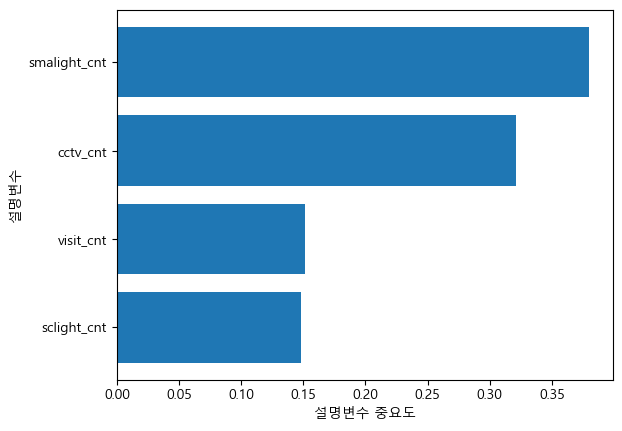

In [31]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name2
df_importance['Importance'] = gb_ftimp2.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## 설명변수의 단위가 다르고, 정규성 검정 결과 정규성을 띄지 않는 변수(cctv_cnt, smalight_cnt) 들이 있어서 min-max scailing 진행 해보기로 함

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df_drop_state)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name2)
df_scaled.head()

,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt
0,0.133131,0.045382,0.160927,0.006901
1,0.236364,0.016687,0.251178,0.025877
2,0.270317,0.037701,0.038345,0.020702
3,0.008756,0.026046,0.000000,0.012076
4,0.201210,0.037171,0.160927,0.053479


## Min-Max Scale 후 DecisionTreeRegressor로 설명변수 중요도 확인

In [34]:
dt_ftimp3 = DecisionTreeRegressor(random_state=789,)
dt_ftimp3.fit(df_scaled, df_final_y)
print("Score on training set: {:.3f}".format(dt_ftimp3.score(df_scaled, df_final_y)))

Score on training set: 1.000


Text(0, 0.5, '설명변수')

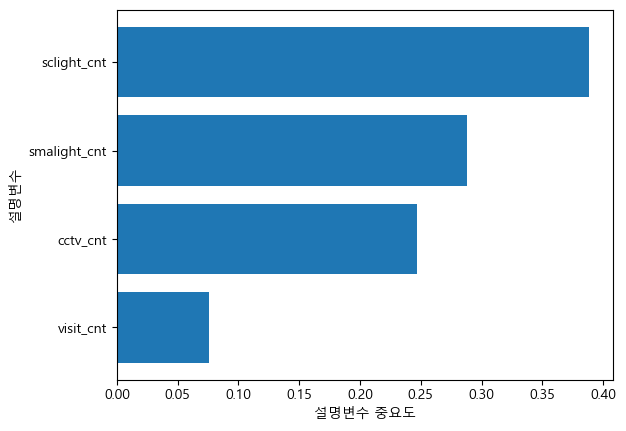

In [35]:
df_importance2 = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance2['Feature'] = v_feature_name2
df_importance2['Importance'] = dt_ftimp3.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance2.sort_values('Importance', ascending = False, inplace = True)
df_importance2.round(3)
df_importance2.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance2))
plt.barh(y = coordinates, width = df_importance2['Importance'])
plt.yticks(coordinates, df_importance2['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [40]:
df_importance2.sort_values(by='Importance', ascending=False, inplace=True)

In [37]:
df_importance2.sum()

Feature       visit_cntcctv_cntsmalight_cntsclight_cnt
Importance                                         1.0
dtype: object

In [ ]:
# cctv_cnt / 인구밀도별 등등 다시 데이터 보기
# 아마도 서울 > 인구밀도가 너무 높아서.. 기존의 회귀 결과가 어쩌면 make sense함.

In [41]:
df_importance2

,Feature,Importance
2,sclight_cnt,0.388600
3,smalight_cnt,0.288090
1,cctv_cnt,0.247209
0,visit_cnt,0.076101


In [48]:
df_withindex=df_final.drop(['new_state', 'mean_hours', 'mean_days', 'crime_rate', 'avg_pop_density'], axis=1)
df_withindex.groupby('state').sum()

,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt
state,,,,
강원도,50118648,1851.0,16910.0,212.0
경기도,126607094,16003.0,51854.0,2173.0
경상남도,49487026,5101.0,33514.0,275.0
경상북도,19024802,2523.0,30588.0,226.0
광주광역시,99400593,1720.0,42196.0,255.0
대구광역시,132201023,9128.0,57018.0,237.0
대전광역시,101756434,3550.0,60008.0,306.5
부산광역시,99646860,2198.0,22283.0,191.0
서울특별시,106405870,9226.0,47125.0,3826.0


In [46]:
df_final

,state,city,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours,mean_days,new_state
0,강원도,정선군,8151609,515.0,4391.0,13.0,0.0271,90.36,427.8,1.62,강원도 정선군
1,강원도,평창군,13399820,190.0,6747.0,46.0,0.0271,90.36,395.8,1.62,강원도 평창군
2,강원도,홍천군,15125927,428.0,1191.0,37.0,0.0271,90.36,388.8,1.54,강원도 홍천군
3,강원도,양구군,1828609,296.0,190.0,22.0,0.0271,90.36,387.2,1.80,강원도 양구군
4,강원도,고성군,11612683,422.0,4391.0,94.0,0.0271,90.36,375.2,1.56,강원도 고성군
...,...,...,...,...,...,...,...,...,...,...,...
73,충청북도,제천시,12125010,979.0,9024.0,314.0,0.0299,219.20,324.8,1.60,충청북도 제천시
74,충청북도,보은군,4737641,316.0,6349.0,99.0,0.0299,219.20,298.2,1.54,충청북도 보은군
75,충청북도,충주시,14797862,1578.0,10600.0,219.0,0.0299,219.20,296.8,1.64,충청북도 충주시
76,충청북도,영동군,4133509,1.0,6076.0,112.0,0.0299,219.20,296.4,1.64,충청북도 영동군


In [ ]:
# G(지수) = 0.39*(sclight_cnt) + 0.29*(smalight_cnt) + 0.25*(cctv_cnt) + 0.08*(visit_cnt)

In [ ]:
# 회귀분석 -뼈대 잡고, ml/dl - 보정 